In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

torch.__version__

'2.1.0+cu121'

In [2]:
#helper function to summarize the properties of a tensor
def describe(x):
    print("Python Type (type(x)) :: {}".format(type(x)))
    print("Type (x.type()) :: {}".format(x.type()))
    print("Data Type (x.dtype) :: {}".format(x.dtype))
    # torch.Size is in fact a tuple, so it supports all tuple operations.
    print("Shape/Size (x.size()) :: {}".format(x.size()))
    print("Shape/Size (x.shape) :: {}".format(x.shape))
    print("Number of elements (x.numel()) :: {}".format(x.numel()))
    # Dimension :: x.ndimension()
    print("Dimension (x.dim()) :: {}".format(x.dim()))
    print("Data :: \n{}".format(x))
    print('-----'*5)

# Tensors

A Pytorch tensor is a data structure that is similar to numpy arrays. It refers to the generalization of vector and matrices to an arbitrary number of dimensions. The dimensionality of a tensor corresponds to the number of indexes used to refer to scalar value within the tensor.

Compared to numpy arrays, Pytorch tensors can also be used on GPUs for very fast operation, distribute operations on multiple devices, and keep track of the graph of computations that created them.

## Scalar (0-d Tensor)

In [3]:
#Scalar (o-d Tensor)
s = torch.tensor(2504)
describe(s)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([])
Shape/Size (x.shape) :: torch.Size([])
Number of elements (x.numel()) :: 1
Dimension (x.dim()) :: 0
Data :: 
2504
-------------------------


## Vector (1-d Tensor)

### Constructing a Tensor directly using python list

#### Using `Tensor` object

In [4]:
m = torch.Tensor([25, 4])
describe(m)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([2])
Shape/Size (x.shape) :: torch.Size([2])
Number of elements (x.numel()) :: 2
Dimension (x.dim()) :: 1
Data :: 
tensor([25.,  4.])
-------------------------


**NOTE:** Tensor object will always create `FloatTensor`.

#### Changing Data type of tensor using `tensor.type()`

In [5]:
print("Original type of tensor m : ", m.type())
print("")
m = m.type(torch.LongTensor)
print("Changed type of tensor m : ", m.type())

Original type of tensor m :  torch.FloatTensor

Changed type of tensor m :  torch.LongTensor


#### Using `tensor()` method

In [6]:
m = torch.tensor([25, 4])
describe(m)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([2])
Shape/Size (x.shape) :: torch.Size([2])
Number of elements (x.numel()) :: 2
Dimension (x.dim()) :: 1
Data :: 
tensor([25,  4])
-------------------------


`torch.tensor()` infer the type of the data automatically, <br>
`torch.Tensor()` is an alias of `torch.FloatTensor()` <br>
**prefer `torch.tensor()`**, Using torch.tensor(), can specify data types. If no dtype is assigned, it will infer from the data.

#### Integer and Float lists to Tensor

In [7]:
int_list = [1,2,3,4,5]
float_list = [1.0,2.0,3.0,4.0,5.0]

In [8]:
int_tensor = torch.tensor(int_list)
describe(int_tensor)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([5])
Shape/Size (x.shape) :: torch.Size([5])
Number of elements (x.numel()) :: 5
Dimension (x.dim()) :: 1
Data :: 
tensor([1, 2, 3, 4, 5])
-------------------------


In [9]:
float_int_tensor = torch.tensor(float_list, dtype=torch.int64)
describe(float_int_tensor)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([5])
Shape/Size (x.shape) :: torch.Size([5])
Number of elements (x.numel()) :: 5
Dimension (x.dim()) :: 1
Data :: 
tensor([1, 2, 3, 4, 5])
-------------------------


In [10]:
int_float_tensor = torch.FloatTensor(int_list)
describe(int_float_tensor)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([5])
Shape/Size (x.shape) :: torch.Size([5])
Number of elements (x.numel()) :: 5
Dimension (x.dim()) :: 1
Data :: 
tensor([1., 2., 3., 4., 5.])
-------------------------


#### `dtype` conversion

In [11]:
int_tensor, int_tensor.dtype

(tensor([1, 2, 3, 4, 5]), torch.int64)

In [12]:
int_tensor.double()

tensor([1., 2., 3., 4., 5.], dtype=torch.float64)

In [13]:
int_tensor.to(torch.short)

tensor([1, 2, 3, 4, 5], dtype=torch.int16)

#### Tensor to list

`to_list()`

In [14]:
int_tensor.tolist()

[1, 2, 3, 4, 5]

### Matrix (2-d)

In [15]:
#Constructing a Tensor directly 
#Creates an unitilised matrix of size 5x4
c = torch.Tensor(5,4)
describe(c)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([5, 4])
Shape/Size (x.shape) :: torch.Size([5, 4])
Number of elements (x.numel()) :: 20
Dimension (x.dim()) :: 2
Data :: 
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.0816e+32,  3.0935e-41,  4.8283e+30,  3.0935e-41],
        [-2.1057e+13,  4.5736e-41,  1.4013e-45,  0.0000e+00],
        [ 7.0065e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])
-------------------------


### Initialising with a numpy array

In [16]:
#Initialized with numpy array
n = torch.tensor(np.array([25, 4], dtype=np.int32))
describe(n)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.IntTensor
Data Type (x.dtype) :: torch.int32
Shape/Size (x.size()) :: torch.Size([2])
Shape/Size (x.shape) :: torch.Size([2])
Number of elements (x.numel()) :: 2
Dimension (x.dim()) :: 1
Data :: 
tensor([25,  4], dtype=torch.int32)
-------------------------


### Creating tensor from numpy array

`.from_numpy()`

In [17]:
a = np.random.rand(10)
print(a)
print(type(a))
print("")
tensor_a = torch.from_numpy(a)
describe(tensor_a)

[0.35709942 0.34874282 0.94317742 0.75136683 0.84532327 0.15697973
 0.92179996 0.86497887 0.2092     0.99372091]
<class 'numpy.ndarray'>

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.DoubleTensor
Data Type (x.dtype) :: torch.float64
Shape/Size (x.size()) :: torch.Size([10])
Shape/Size (x.shape) :: torch.Size([10])
Number of elements (x.numel()) :: 10
Dimension (x.dim()) :: 1
Data :: 
tensor([0.3571, 0.3487, 0.9432, 0.7514, 0.8453, 0.1570, 0.9218, 0.8650, 0.2092,
        0.9937], dtype=torch.float64)
-------------------------


### To numpy array

`.numpy()`

In [18]:
back_to_numpy_a = tensor_a.numpy()
back_to_numpy_a, back_to_numpy_a.dtype

(array([0.35709942, 0.34874282, 0.94317742, 0.75136683, 0.84532327,
        0.15697973, 0.92179996, 0.86497887, 0.2092    , 0.99372091]),
 dtype('float64'))

### From Pandas Series & Dataframe

#### Series --> nd-array --> tensor

In [19]:
pd_series = pd.Series(np.arange(1,11,2))
print(pd_series)
print(type(pd_series))
print("")
tensor_from_series = torch.from_numpy(pd_series.values)
describe(tensor_from_series)

0    1
1    3
2    5
3    7
4    9
dtype: int64
<class 'pandas.core.series.Series'>

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([5])
Shape/Size (x.shape) :: torch.Size([5])
Number of elements (x.numel()) :: 5
Dimension (x.dim()) :: 1
Data :: 
tensor([1, 3, 5, 7, 9])
-------------------------


#### Dataframe --> nd array --> tensor

In [20]:
df = pd.DataFrame({'a':[11,21,31],'b':[12,22,32], 'c':[13,23,33]})
print(df)
print(type(df))
print("")

tensor_fron_dataframe = torch.from_numpy(df.values)
describe(tensor_fron_dataframe)

    a   b   c
0  11  12  13
1  21  22  23
2  31  32  33
<class 'pandas.core.frame.DataFrame'>

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([3, 3])
Shape/Size (x.shape) :: torch.Size([3, 3])
Number of elements (x.numel()) :: 9
Dimension (x.dim()) :: 2
Data :: 
tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
-------------------------


### Different Tensor Creation

#### Empty

Creates an unitialised tensor

In [21]:
empt = torch.empty(10)
describe(empt)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([10])
Shape/Size (x.shape) :: torch.Size([10])
Number of elements (x.numel()) :: 10
Dimension (x.dim()) :: 1
Data :: 
tensor([-1.3379e-07,  4.5737e-41,  8.8945e+31,  3.0935e-41,  8.9367e+31,
         3.0935e-41,  1.1210e-44,  0.0000e+00,  1.5112e+23,  1.0871e-05])
-------------------------


#### Zeros

Creates a tensor initialised with zeros

In [22]:
z = torch.zeros(2,3,4)
describe(z)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([2, 3, 4])
Shape/Size (x.shape) :: torch.Size([2, 3, 4])
Number of elements (x.numel()) :: 24
Dimension (x.dim()) :: 3
Data :: 
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
-------------------------


#### Ones

Creates a tensor initialised with ones

In [23]:
#torch.ones()
#_like :: Creating a tensor using the existing Tensor; 
#         These methods will reuse properties of the input tensor, e.g. dtype, unless new values are provided
o = torch.ones_like(z)
describe(o)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([2, 3, 4])
Shape/Size (x.shape) :: torch.Size([2, 3, 4])
Number of elements (x.numel()) :: 24
Dimension (x.dim()) :: 3
Data :: 
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
-------------------------


#### Filled with a value

Creates a tensor filled with the same value

In [24]:
#torch.fill(shape, val)
z.fill_(25) #_ ===> in-place operation
describe(z)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([2, 3, 4])
Shape/Size (x.shape) :: torch.Size([2, 3, 4])
Number of elements (x.numel()) :: 24
Dimension (x.dim()) :: 3
Data :: 
tensor([[[25., 25., 25., 25.],
         [25., 25., 25., 25.],
         [25., 25., 25., 25.]],

        [[25., 25., 25., 25.],
         [25., 25., 25., 25.],
         [25., 25., 25., 25.]]])
-------------------------


#### Diagonal Matrix

In [25]:
#Creating a diagonal matrix tensor using the input data
#input data must be a torch tensor
d = torch.diag(torch.tensor([1,2,3,4]))
describe(d)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([4, 4])
Shape/Size (x.shape) :: torch.Size([4, 4])
Number of elements (x.numel()) :: 16
Dimension (x.dim()) :: 2
Data :: 
tensor([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]])
-------------------------


#### Identity Matrix

In [26]:
#Creating an identity matrix
#default dtype is float
i = torch.eye(5,5, dtype=torch.int64)
describe(i)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([5, 5])
Shape/Size (x.shape) :: torch.Size([5, 5])
Number of elements (x.numel()) :: 25
Dimension (x.dim()) :: 2
Data :: 
tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])
-------------------------


#### Initialised with random values

In [27]:
#Creates a tensor insitialised with 10 uniform random values
x = torch.rand(2,5)
describe(x)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([2, 5])
Shape/Size (x.shape) :: torch.Size([2, 5])
Number of elements (x.numel()) :: 10
Dimension (x.dim()) :: 2
Data :: 
tensor([[0.9555, 0.5215, 0.2370, 0.4344, 0.8030],
        [0.0571, 0.0521, 0.1377, 0.3538, 0.8401]])
-------------------------


In [28]:
#Creating a normal distribution tensor of shape x
#x_normal = torch.randn(shape)
x_normal = torch.randn_like(x)
describe(x_normal)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([2, 5])
Shape/Size (x.shape) :: torch.Size([2, 5])
Number of elements (x.numel()) :: 10
Dimension (x.dim()) :: 2
Data :: 
tensor([[ 0.0370,  0.6863,  0.6296, -0.3906, -0.1329],
        [-0.0994,  1.2096,  0.1256,  1.6446,  0.3051]])
-------------------------


In [29]:
# randint(start, end, size(must be a tuple))
rand_ints = torch.randint(0, 100, (5, 4))
describe(rand_ints)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([5, 4])
Shape/Size (x.shape) :: torch.Size([5, 4])
Number of elements (x.numel()) :: 20
Dimension (x.dim()) :: 2
Data :: 
tensor([[82, 86, 22, 45],
        [39, 23, 39, 69],
        [34, 32, 52, 41],
        [49, 25,  4, 69],
        [68, 98, 31, 61]])
-------------------------


#### Using Sequences

In [30]:
#linspace(start, end, number of elements)
# Linespace returns evenly spaced numbers over a specified interval.
ls = torch.linspace(20, 30, 100)
describe(ls)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([100])
Shape/Size (x.shape) :: torch.Size([100])
Number of elements (x.numel()) :: 100
Dimension (x.dim()) :: 1
Data :: 
tensor([20.0000, 20.1010, 20.2020, 20.3030, 20.4040, 20.5051, 20.6061, 20.7071,
        20.8081, 20.9091, 21.0101, 21.1111, 21.2121, 21.3131, 21.4141, 21.5152,
        21.6162, 21.7172, 21.8182, 21.9192, 22.0202, 22.1212, 22.2222, 22.3232,
        22.4242, 22.5253, 22.6263, 22.7273, 22.8283, 22.9293, 23.0303, 23.1313,
        23.2323, 23.3333, 23.4343, 23.5354, 23.6364, 23.7374, 23.8384, 23.9394,
        24.0404, 24.1414, 24.2424, 24.3434, 24.4444, 24.5455, 24.6465, 24.7475,
        24.8485, 24.9495, 25.0505, 25.1515, 25.2525, 25.3535, 25.4545, 25.5556,
        25.6566, 25.7576, 25.8586, 25.9596, 26.0606, 26.1616, 26.2626, 26.3636,
        26.4646, 26.5657, 26.6667, 26.7677, 26.8687, 26.9697, 27.0707, 27.1717,
 

In [31]:
#range(start, end, skip)
rg = torch.range(0, 100, 3)
describe(rg)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.FloatTensor
Data Type (x.dtype) :: torch.float32
Shape/Size (x.size()) :: torch.Size([34])
Shape/Size (x.shape) :: torch.Size([34])
Number of elements (x.numel()) :: 34
Dimension (x.dim()) :: 1
Data :: 
tensor([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39.,
        42., 45., 48., 51., 54., 57., 60., 63., 66., 69., 72., 75., 78., 81.,
        84., 87., 90., 93., 96., 99.])
-------------------------


## Indexing & Slicing
Accessing elements, rows, columns, sub-tensor from a tensor

In [32]:
rand_ints.data

tensor([[82, 86, 22, 45],
        [39, 23, 39, 69],
        [34, 32, 52, 41],
        [49, 25,  4, 69],
        [68, 98, 31, 61]])

In [33]:
rand_ints[0][2]

tensor(22)

In [34]:
rand_ints[0,2]

tensor(22)

Accessing an element from a tensor returns tensor object. To get the element use `.item()`

In [35]:
rand_ints[0][2].item()

22

In [36]:
#Indexing and Slicing
#3rd row, 2nd and 3rd column
rand_ints[2, 1:3]

tensor([32, 52])

In [37]:
#Updating the tensor
rand_ints[2, 1:3] = torch.Tensor([19, 91])
rand_ints.data

tensor([[82, 86, 22, 45],
        [39, 23, 39, 69],
        [34, 19, 91, 41],
        [49, 25,  4, 69],
        [68, 98, 31, 61]])

In [38]:
#first column
rand_ints[:, 0]

tensor([82, 39, 34, 49, 68])

In [39]:
#first 2 row
rand_ints[:2,:]

tensor([[82, 86, 22, 45],
        [39, 23, 39, 69]])

In [40]:
#last 3 column
rand_ints[:,-3:]

tensor([[86, 22, 45],
        [23, 39, 69],
        [19, 91, 41],
        [25,  4, 69],
        [98, 31, 61]])

In [41]:
#last row
rand_ints[-1,:]

tensor([68, 98, 31, 61])

#### Non-contiguous row/cols indexing using `torch.index_select()`

In [42]:
#Access 2nd and 4th col
indices = torch.LongTensor([1,3]) # Index must be integers
describe(torch.index_select(rand_ints, dim=1, index=indices))

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([5, 2])
Shape/Size (x.shape) :: torch.Size([5, 2])
Number of elements (x.numel()) :: 10
Dimension (x.dim()) :: 2
Data :: 
tensor([[86, 45],
        [23, 69],
        [19, 41],
        [25, 69],
        [98, 61]])
-------------------------


In [43]:
rand_ints[:,[1,3]]

tensor([[86, 45],
        [23, 69],
        [19, 41],
        [25, 69],
        [98, 61]])

In [44]:
#access 2nd and 4th row
describe(torch.index_select(rand_ints, dim=0, index=indices))

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([2, 4])
Shape/Size (x.shape) :: torch.Size([2, 4])
Number of elements (x.numel()) :: 8
Dimension (x.dim()) :: 2
Data :: 
tensor([[39, 23, 39, 69],
        [49, 25,  4, 69]])
-------------------------


In [45]:
rand_ints[[1,3]]

tensor([[39, 23, 39, 69],
        [49, 25,  4, 69]])

#### Non-contiguous cell indexing

In [46]:
print(rand_ints.data)
idx = torch.LongTensor([[2,2], [1,3], [0,0], [3,1], [4,3]])
rand_ints[list(idx.T)]

tensor([[82, 86, 22, 45],
        [39, 23, 39, 69],
        [34, 19, 91, 41],
        [49, 25,  4, 69],
        [68, 98, 31, 61]])


tensor([91, 69, 82, 25, 61])

### Joining tensors

`torch.cat()`: Concatenating sequence of tensor along a given dimension (existing axis).

All tensors must have same shape or be empty.

In [47]:
t1 = torch.cat([rand_ints, rand_ints], dim=0)
describe(t1)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([10, 4])
Shape/Size (x.shape) :: torch.Size([10, 4])
Number of elements (x.numel()) :: 40
Dimension (x.dim()) :: 2
Data :: 
tensor([[82, 86, 22, 45],
        [39, 23, 39, 69],
        [34, 19, 91, 41],
        [49, 25,  4, 69],
        [68, 98, 31, 61],
        [82, 86, 22, 45],
        [39, 23, 39, 69],
        [34, 19, 91, 41],
        [49, 25,  4, 69],
        [68, 98, 31, 61]])
-------------------------


In [48]:
t1 = torch.cat([rand_ints, rand_ints, rand_ints], dim=1)
describe(t1)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([5, 12])
Shape/Size (x.shape) :: torch.Size([5, 12])
Number of elements (x.numel()) :: 60
Dimension (x.dim()) :: 2
Data :: 
tensor([[82, 86, 22, 45, 82, 86, 22, 45, 82, 86, 22, 45],
        [39, 23, 39, 69, 39, 23, 39, 69, 39, 23, 39, 69],
        [34, 19, 91, 41, 34, 19, 91, 41, 34, 19, 91, 41],
        [49, 25,  4, 69, 49, 25,  4, 69, 49, 25,  4, 69],
        [68, 98, 31, 61, 68, 98, 31, 61, 68, 98, 31, 61]])
-------------------------


`torch.stack(tensors, dim=0, *, out=None)`: Concatenates a sequence of tensors along a new dimension (new axis).

In [49]:
stacked_t1 = torch.stack([rand_ints, rand_ints], dim=0)
describe(stacked_t1)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([2, 5, 4])
Shape/Size (x.shape) :: torch.Size([2, 5, 4])
Number of elements (x.numel()) :: 40
Dimension (x.dim()) :: 3
Data :: 
tensor([[[82, 86, 22, 45],
         [39, 23, 39, 69],
         [34, 19, 91, 41],
         [49, 25,  4, 69],
         [68, 98, 31, 61]],

        [[82, 86, 22, 45],
         [39, 23, 39, 69],
         [34, 19, 91, 41],
         [49, 25,  4, 69],
         [68, 98, 31, 61]]])
-------------------------


### Splitting the tensor

`torch.chunk()`: Splits the tensor into a specific number of chunks.

In [50]:
torch.chunk(t1, 3, dim=1)

(tensor([[82, 86, 22, 45],
         [39, 23, 39, 69],
         [34, 19, 91, 41],
         [49, 25,  4, 69],
         [68, 98, 31, 61]]),
 tensor([[82, 86, 22, 45],
         [39, 23, 39, 69],
         [34, 19, 91, 41],
         [49, 25,  4, 69],
         [68, 98, 31, 61]]),
 tensor([[82, 86, 22, 45],
         [39, 23, 39, 69],
         [34, 19, 91, 41],
         [49, 25,  4, 69],
         [68, 98, 31, 61]]))

In [51]:
torch.chunk(t1, 3, dim=0)

(tensor([[82, 86, 22, 45, 82, 86, 22, 45, 82, 86, 22, 45],
         [39, 23, 39, 69, 39, 23, 39, 69, 39, 23, 39, 69]]),
 tensor([[34, 19, 91, 41, 34, 19, 91, 41, 34, 19, 91, 41],
         [49, 25,  4, 69, 49, 25,  4, 69, 49, 25,  4, 69]]),
 tensor([[68, 98, 31, 61, 68, 98, 31, 61, 68, 98, 31, 61]]))

`torch.split(tensor, split_size_or_sections, dim=0)`: Another function to split the tensor, insted of number of chunks, size of chunk needs to be passed. If the tensor_size is not divisible by split_size, last chunk will be smaller.

In [52]:
torch.split(t1, 3, dim=0)

(tensor([[82, 86, 22, 45, 82, 86, 22, 45, 82, 86, 22, 45],
         [39, 23, 39, 69, 39, 23, 39, 69, 39, 23, 39, 69],
         [34, 19, 91, 41, 34, 19, 91, 41, 34, 19, 91, 41]]),
 tensor([[49, 25,  4, 69, 49, 25,  4, 69, 49, 25,  4, 69],
         [68, 98, 31, 61, 68, 98, 31, 61, 68, 98, 31, 61]]))

if section, sum of section sizes must be equal to total (`3 + 2 + 3 + 4 = 12`, here number of columns)

In [53]:
torch.split(t1, [3,2,3,4], dim=1)

(tensor([[82, 86, 22],
         [39, 23, 39],
         [34, 19, 91],
         [49, 25,  4],
         [68, 98, 31]]),
 tensor([[45, 82],
         [69, 39],
         [41, 34],
         [69, 49],
         [61, 68]]),
 tensor([[86, 22, 45],
         [23, 39, 69],
         [19, 91, 41],
         [25,  4, 69],
         [98, 31, 61]]),
 tensor([[82, 86, 22, 45],
         [39, 23, 39, 69],
         [34, 19, 91, 41],
         [49, 25,  4, 69],
         [68, 98, 31, 61]]))

### Squeeze and Unsqueeze

`torch.squeeze()`:  Returns a tensor with all the dimensions of input of size 1 removed.

For example, if input is of shape: (A×1×B×C×1×D) then the out tensor will be of shape: (A×B×C×D) 

In [54]:
x = torch.zeros(2,1,2,1,2)
print(x.size())
print("")
y = torch.squeeze(x)
print(y.size())
print("")
y = torch.squeeze(x, dim=1)
print(y.size())
print("")
y = torch.squeeze(x, dim=3)
print(y.size())

torch.Size([2, 1, 2, 1, 2])

torch.Size([2, 2, 2])

torch.Size([2, 2, 1, 2])

torch.Size([2, 1, 2, 2])


`torch.unsqueeze(input, dim)`: Returns a new tensor with a dimension of size one inserted at the specified position.

The returned tensor shares the same underlying data with this tensor.

In [55]:
rand_ints

tensor([[82, 86, 22, 45],
        [39, 23, 39, 69],
        [34, 19, 91, 41],
        [49, 25,  4, 69],
        [68, 98, 31, 61]])

In [56]:
torch.unsqueeze(rand_ints, dim=0), torch.unsqueeze(rand_ints, dim=0).size()

(tensor([[[82, 86, 22, 45],
          [39, 23, 39, 69],
          [34, 19, 91, 41],
          [49, 25,  4, 69],
          [68, 98, 31, 61]]]),
 torch.Size([1, 5, 4]))

In [57]:
torch.unsqueeze(rand_ints, dim=1), torch.unsqueeze(rand_ints, dim=1).size()

(tensor([[[82, 86, 22, 45]],
 
         [[39, 23, 39, 69]],
 
         [[34, 19, 91, 41]],
 
         [[49, 25,  4, 69]],
 
         [[68, 98, 31, 61]]]),
 torch.Size([5, 1, 4]))

### Reshaping

In [58]:
a = torch.arange(1, 21, dtype=torch.int32)
describe(a)
reshaped_a = a.view(2,2,5)
describe(reshaped_a)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.IntTensor
Data Type (x.dtype) :: torch.int32
Shape/Size (x.size()) :: torch.Size([20])
Shape/Size (x.shape) :: torch.Size([20])
Number of elements (x.numel()) :: 20
Dimension (x.dim()) :: 1
Data :: 
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20], dtype=torch.int32)
-------------------------
Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.IntTensor
Data Type (x.dtype) :: torch.int32
Shape/Size (x.size()) :: torch.Size([2, 2, 5])
Shape/Size (x.shape) :: torch.Size([2, 2, 5])
Number of elements (x.numel()) :: 20
Dimension (x.dim()) :: 3
Data :: 
tensor([[[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]],

        [[11, 12, 13, 14, 15],
         [16, 17, 18, 19, 20]]], dtype=torch.int32)
-------------------------


In [59]:
# For dynamic size arrays or when size is unknown
# -1 is inferred from other dimension
# Only one arguement can be set to -1
reshaped_a = a.view(-1,4)
describe(reshaped_a)
reshaped_a = a.view(10,-1)
describe(reshaped_a)

Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.IntTensor
Data Type (x.dtype) :: torch.int32
Shape/Size (x.size()) :: torch.Size([5, 4])
Shape/Size (x.shape) :: torch.Size([5, 4])
Number of elements (x.numel()) :: 20
Dimension (x.dim()) :: 2
Data :: 
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20]], dtype=torch.int32)
-------------------------
Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.IntTensor
Data Type (x.dtype) :: torch.int32
Shape/Size (x.size()) :: torch.Size([10, 2])
Shape/Size (x.shape) :: torch.Size([10, 2])
Number of elements (x.numel()) :: 20
Dimension (x.dim()) :: 2
Data :: 
tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16],
        [17, 18],
        [19, 20]], dtype=torch.int32)
-------------------------


### Tensor Functions
#### sum(), max(), mean(), median(), min(), std(), etc

In [60]:
# For 3d tensors, dim=0 represents 2D tenasors, dim=1 represents rows, dim=2 represents column
a = a.view(2,5,2)
print(a)
print("")
print(a.sum()) 
print("")
print(a.sum(dim=0))
print("")
print(a.sum(dim=1))
print("")
print(a.sum(dim=2))

tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8],
         [ 9, 10]],

        [[11, 12],
         [13, 14],
         [15, 16],
         [17, 18],
         [19, 20]]], dtype=torch.int32)

tensor(210)

tensor([[12, 14],
        [16, 18],
        [20, 22],
        [24, 26],
        [28, 30]])

tensor([[25, 30],
        [75, 80]])

tensor([[ 3,  7, 11, 15, 19],
        [23, 27, 31, 35, 39]])


In [61]:
a.float().mean()

tensor(10.5000)

In [62]:
a.float().std()

tensor(5.9161)

In [63]:
a.max()

tensor(20, dtype=torch.int32)

In [64]:
a.min()

tensor(1, dtype=torch.int32)

In [65]:
tnsr = torch.linspace(0, 2*np.pi, 100)
sin_tnsr = torch.sin(tnsr)

In [66]:
# command "matplotlib inline" to display the plot.
%matplotlib inline

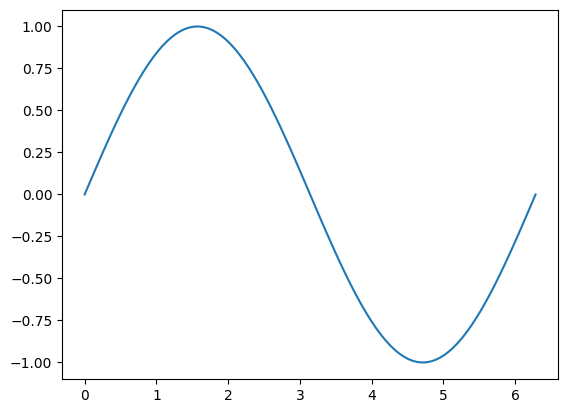

In [67]:
plt.plot(tnsr.numpy(), sin_tnsr.numpy())

Check this [link](https://pytorch.org/docs/stable/torch.html#) for more tensor operations.

### Arithmetic

In [68]:
#Arithmetic operations +, -, *, /
a = torch.randint(0,10,(2,2))
print(a)
b = torch.randint(0,10,(2,2))
print(b)

c = a+b
c

tensor([[0, 6],
        [3, 7]])
tensor([[6, 6],
        [2, 6]])


tensor([[ 6, 12],
        [ 5, 13]])

In [69]:
#_ signifies for inplace operation(Here, addition)
a.add_(b)

tensor([[ 6, 12],
        [ 5, 13]])

`*` or `mul()` signifies element wise multiplication operation. Also known as *Hamdard Product*

In [70]:
a

tensor([[ 6, 12],
        [ 5, 13]])

In [71]:
a * b

tensor([[36, 72],
        [10, 78]])

In [72]:
a * 4

tensor([[24, 48],
        [20, 52]])

### Linear Algebra

In [73]:
x1 = torch.arange(6).view(2,3)
x2 = torch.randint(1, 11, (3,1))
print("x1", "\n============")
describe(x1)
print("============\n")
print("x2", "\n============")
describe(x2)
print("============\n")
print("x1 matmul x2", "\n============")
describe(torch.matmul(x1, x2))
print("============\n")
print("x1 transpose", "\n============")
describe(torch.transpose(x1, 0, 1))
print("============\n")

x1 
Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([2, 3])
Shape/Size (x.shape) :: torch.Size([2, 3])
Number of elements (x.numel()) :: 6
Dimension (x.dim()) :: 2
Data :: 
tensor([[0, 1, 2],
        [3, 4, 5]])
-------------------------

x2 
Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([3, 1])
Shape/Size (x.shape) :: torch.Size([3, 1])
Number of elements (x.numel()) :: 3
Dimension (x.dim()) :: 2
Data :: 
tensor([[8],
        [8],
        [6]])
-------------------------

x1 matmul x2 
Python Type (type(x)) :: <class 'torch.Tensor'>
Type (x.type()) :: torch.LongTensor
Data Type (x.dtype) :: torch.int64
Shape/Size (x.size()) :: torch.Size([2, 1])
Shape/Size (x.shape) :: torch.Size([2, 1])
Number of elements (x.numel()) :: 2
Dimension (x.dim()) :: 2
Data :: 
tensor([[20],
   

In [74]:
#Vector Dot Product
v1 = torch.tensor([1,2,3])
v2 = torch.tensor([4,5,6])
v1.dot(v2)

tensor(32)

In [75]:
torch.dot(v1, v2)

tensor(32)

### Pytorch and Numpy Bridge

In [76]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
print("")
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


A change in tensor implies change in the Numpy Array and vice-versa.

In [77]:
n = np.ones(5)
t = torch.from_numpy(n)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
print("")
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
n: [1. 1. 1. 1. 1.]

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Variables

In [78]:
# Variables are wrapper around the tensor ith gradient and reference to a function that created it.
from torch.autograd import Variable
x = Variable(torch.ones(2,2), requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

### Tensor on GPU

In [79]:
#Tensors can be moved to any device.
#Following code checks if GPU is available, maked cuda (GPU) default device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# use ``torch.device`` objects to move tensors in and out of GPU
x3 = torch.rand(2,5).to(device)
if device == "cuda":
    print(torch.cuda.get_device_name(0))
    print(x3.type())
else:
    print(device)
    print(x3.type())

cpu
torch.FloatTensor
